In [16]:
#coding:utf-8
from classifiers.cnn import *
from datareader.data_utils import *
from layers.layers import *
from layers.layer_utils import *
from solver.solver import *
from time import *
import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#样本数据
data = get_MNIST_data()
#搭建模型
num_cp =4
num_hid =2
num_pool = 2 
num_filters = [16,16,32,32]
num_hids = [128,128]
filter_size = [3,3,3,3]
conv_param = [{} for i in xrange(num_cp)]
pool_param = [{} for i in xrange(num_pool)]
for i in range(num_cp):
    conv_param[i]['stride'] = 1
    conv_param[i]['pad'] = (filter_size[i] - 1)/2
for i in range(num_pool):
    pool_param[i]['pool_height'] = 2
    pool_param[i]['pool_width'] = 2
    pool_param[i]['stride'] = 2   

MyModel = MultiLaterConvNet(input_dim=(1, 28, 28),
                            num_filters=num_filters, 
                            num_hids=num_hids, 
                            filter_size=filter_size, 
                            num_classes=10, 
                            weight_scale=1e-1, 
                            reg=0.05, 
                            conv_params=conv_param, 
                            pool_params=pool_param, 
                            dtype=np.float32, 
                            use_batchnorm=True)
#num_train = 100
input_data = {
    'X_train': data['X_train'],
    'y_train': data['y_train'],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}
print input_data['X_train'].shape
print input_data['y_train'].shape
print input_data['X_val'].shape
print input_data['y_val'].shape
solver = Solver(MyModel, input_data,
                num_epochs=15, batch_size=128,
                update_rule='sgd_momentum',
                optim_config={
                    'learning_rate': 1e-1,
                    },
                lr_decay = 0.5,
                verbose=True, 
                print_every=50)

(59000, 1, 28, 28)
(59000,)
(1000, 1, 28, 28)
(1000,)


In [7]:
solver.train()

train11
(Iteration 1 / 9200) loss: 0.849482
(Epoch 0 / 20) train acc: 0.854000; val_acc: 0.887000
(Iteration 51 / 9200) loss: 0.618701
(Iteration 101 / 9200) loss: 0.686107
(Iteration 151 / 9200) loss: 0.626637
(Iteration 201 / 9200) loss: 0.795159
(Iteration 251 / 9200) loss: 0.645529
(Iteration 301 / 9200) loss: 0.748392
(Iteration 351 / 9200) loss: 0.697815
(Iteration 401 / 9200) loss: 0.657185
(Iteration 451 / 9200) loss: 0.617493
(Epoch 1 / 20) train acc: 0.659000; val_acc: 0.679000
(Iteration 501 / 9200) loss: 0.500686
(Iteration 551 / 9200) loss: 0.381232
(Iteration 601 / 9200) loss: 0.363826
(Iteration 651 / 9200) loss: 0.385318
(Iteration 701 / 9200) loss: 0.435770
(Iteration 751 / 9200) loss: 0.416379
(Iteration 801 / 9200) loss: 0.413717
(Iteration 851 / 9200) loss: 0.427671
(Iteration 901 / 9200) loss: 0.527451
(Epoch 2 / 20) train acc: 0.950000; val_acc: 0.935000
(Iteration 951 / 9200) loss: 0.330313
(Iteration 1001 / 9200) loss: 0.304184
(Iteration 1051 / 9200) loss: 0.25

In [8]:
solver.Save()

done


In [14]:
def check_accuracy(X, y, model, num_samples=None, batch_size=100):
    N = X.shape[0]
    if num_samples is not None and N > num_samples:
        mask = np.random.choice(N, num_samples)
        N = num_samples
        X = X[mask]
        y = y[mask]

    #batch的个数
    num_batches = N / batch_size
    if N % batch_size != 0:
        num_batches += 1
    y_pred = []
    #计算每个batch预测值
    for i in xrange(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        scores = model.loss(X[start:end])
        y_pred.append(np.argmax(scores, axis=1))
    y_pred = np.hstack(y_pred)
    acc = np.mean(y_pred == y)
    return acc

In [15]:
print check_accuracy(data['X_test'],data['y_test'],MyModel)

0.9734


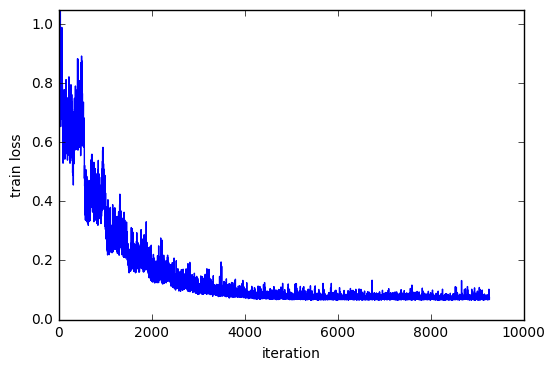

In [23]:
plt.subplot(1, 1, 1)
plt.ylim(0,1.05)
plt.plot(solver.loss_history, '-b')
plt.xlabel('iteration')
plt.ylabel('train loss')
plt.show()
plt.savefig('/home/cjt/chen_obj/tupu/train_loss.png')

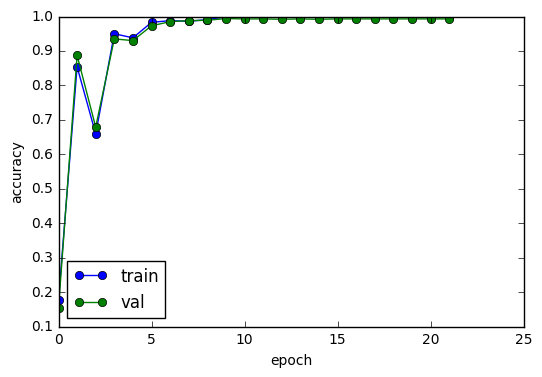

In [25]:
plt.subplot(1, 1, 1)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='lower left')
#plt.legend(loc='lower left',fontsize='large')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()